# 이미지 바운딩 박스 편집

In [141]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from predict import *


import torch.optim as optim
import torch.nn as nn

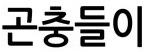

In [159]:
img = Image.open("/home/jun/myWorks/soma/font/dataset/realTesting/곤충들이_158.jpg")
img_np = np.array(img)
img

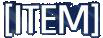

In [108]:
mask = Image.open("/home/jun/myWorks/soma/font/dataset/realTesting_crop/aaa_38.jpg")
mask_np = np.array(mask)
mask

In [113]:
gray = cv.cvtColor(img_np, cv.COLOR_BGR2GRAY)
dst = cv.Canny(gray, 224, 255)
inv_img = 255 - dst
aa = cv.floodFill(inv_img, None, (0,0), (255, 0, 0), loDiff=(0, 0, 0, 0), upDiff=(0, 0, 0, 0))


In [116]:
Image.fromarray(dst)

In [114]:
Image.fromarray(inv_img)

In [133]:
grabMask = np.zeros_like(img_np)
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)
rect = (0,0, *img_np.shape[:2])

In [134]:
cv.grabCut(img_np, grabMask, rect, bgdmodel, fgdmodel, 1, cv.GC_INIT_WITH_RECT)

(array([[3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.06730769e-01,  5.42467949e-01,  6.57051282e-02,
          9.53525641e-02,  8.97435897e-02,  2.41720930e+02,
          2.51779070e+02,  2.53910853e+02,  5.85228951e+01,
          7.91240768e+01,  1.08428360e+02,  1.59439024e+02,
          1.70963415e+02,  1.83975610e+02,  2.05445378e+02,
          2.19226891e+02,  2.32394958e+02,  9.34464286e+01,
          1.10991071e+02,  1.28919643e+02,  4.93484767e+01,
          1.56360195e+01,  1.11078060e+00,  1.56360195e+01,
          1.74977015e+01,  3.75549847e+00,  1.11078060e+00,
          3.75549847e+00,  6.77112253e+00,  6.25567136e+01,
          2.49868195e+01, -5.66859614e+00,  2.49868195e+01,
          3.58693908e+01,  2.97356244e+01, -5.66859614e+00,
          2.97356244e+01,  1.38519609e+02,  2.70295062

In [139]:
img2 = img_np.copy()
# 마스크에 확실한 배경, 아마도 배경으로 표시된 영역을 0으로 채우기
img2[(grabMask==cv.GC_BGD) | (grabMask==cv.GC_PR_BGD)] = 0

In [140]:
Image.fromarray(img2)

In [84]:
crnn_predict([dst])

['출록']

In [ ]:
unique, counts = np.unique(img_np.reshape(-1, 3), axis=0, return_counts=True) # 이미지 픽셀별로 색 빈도 생성
r, g, b = unique[np.argsort(counts)[::-1][1]] #가장 많이 나타나는 r, g, b 값을 받아 옵니다.

In [167]:
gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
gray = 255-gray
# threshold
thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]

# get the (largest) contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw white filled contour on black background
img2 = np.full_like(img_np, 255, np.uint8)
_ = cv2.drawContours(img2, contours, 0, (0,0,0), cv2.FILLED)

In [170]:
Image.fromarray(gray)

AttributeError: 'list' object has no attribute '__array_interface__'

In [162]:
crnn_predict([img2])

['1']